In [14]:
import qiskit

In [ ]:
from qiskit_ibm_provider import IBMProvider

# Replace 'YOUR_TOKEN_HERE' with your actual IBM Quantum token
IBMProvider.save_account(token='d6f46b30e816ce68e1443bb9d9a02438a0921f1c6183fb6ca019f0d921fa2725b42b9a4789c58ee8f7e7c5d79e19d5902de3b8001520c205035b37efa310bf67', overwrite=True)

# Initialize the provider
provider = IBMProvider()

# Now you can use the provider to access IBM Quantum services

In [ ]:
IBMProvider.save_account(token='d6f46b30e816ce68e1443bb9d9a02438a0921f1c6183fb6ca019f0d921fa2725b42b9a4789c58ee8f7e7c5d79e19d5902de3b8001520c205035b37efa310bf67', overwrite=True)

In [10]:
import qiskit as q
%matplotlib inline
circuit=q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

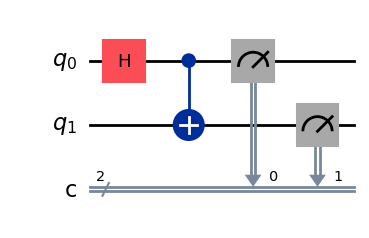

In [11]:
circuit.draw(output="mpl")

In [2]:
from qiskit_ibm_provider import IBMProvider

# Load the saved account
provider = IBMProvider()

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

C:\Users\Minnu\AppData\Local\Temp\ipykernel_6792\3372708318.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


ibm_brisbane has 456 queued and 127 qubits
ibm_kyoto has 436 queued and 127 qubits
ibm_osaka has 410 queued and 127 qubits
ibm_sherbrooke has 881 queued and 127 qubits


In [3]:
from qiskit.tools.monitor import job_monitor
backend=provider.get_backend("ibmq_lima")
job=q.execute(circuit,backend=backend,shots=1024)
job_monitor(job)

ModuleNotFoundError: No module named 'qiskit.tools'

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])

In [ ]:
backend=provider.get_backend("ibmq_qasm_simulator")
circuit=q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()

In [ ]:
job=q.execute(circuit,backend=backend,shots=1024)
job_monitor(job)


In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])

In [ ]:
from qiskit import Aer
sim_backend=Aer.get_backend("qasm_simulator")
for backend in Aer.backends():
    print(backend)

In [ ]:
job=q.execute(circuit,backend=sim_backend,shots=1024)
job_monitor(job)

In [ ]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")
result=job.result()
count=result.get_counts(circuit)
plot_histogram([count])


In [ ]:
from qiskit import *
circuit=QuantumCircuit(3,3)
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_state_qsphere

In [ ]:
# QFT
# Initialize the 3-qubit quantum circuit
# Set the state '110'
s = '110'
num_qubits = len(s)
qc = QuantumCircuit(num_qubits)

In [ ]:
# Set reverse ordering
s = s[::-1]

In [ ]:
# Construct the state 110
for idx in range(num_qubits):
    if s[idx] == '1':
        qc.x(idx)
qc.barrier()
qc.draw()


In [ ]:
circuit.draw(output='mpl')

In [ ]:
# Import the value pi for our rotations
from numpy import pi
# Always start from the most significant qubit,
# in this case it's q2.
# Step 1, add a Hadamard gate
qc.h(2)

In [ ]:
# Step 2, add CROT gates from most significant qubit
qc.cu1(pi/2,1,2)

In [ ]:
# Step 3, add another CROT from 2 to the next qubit down,
# while doubling the phase denominator
qc.cu1(pi/4, 0, 2)
# Draw the circuit
qc.draw()

In [ ]:
# Now that we finished from 2 down to 0
# We'll drop to the next least significant qubit and
# start again,
# Step 1, add a Hadamard gate
qc.h(1)


In [4]:
# Step 2, add Control Rotation (CROT) gates from most
# significant towards
# least significant starting a pi/2, and doubling the
# denominator
# as you go down each qubit.
qc.cu1(pi/2, 0, 1)
# Draw the circuit
qc.draw()
# Now that we finished from 1 down to 0
# We'll drop to the next least significant qubit and 
# Start again

NameError: name 'qc' is not defined

In [5]:
# Step 1, add a Hadamard gate
qc.h(0)
# Since we are at the least significant qubit, we are
# done!
# Draw the circuit
qc.draw()

NameError: name 'qc' is not defined

In [6]:
# Define a function which will add the swap gates to the 
# outer
# pair of qubits
def add_swap_gates(qc_swaps,qubits):
    for qubit in range(qubits//2):
        qc-swaps.swap(qubit, qubit-qubit-1)
    return qc_swaps

In [7]:
qft_circuit=add_swap_gates(qc, num, qubits)
qft_circuit.draw()

NameError: name 'qc' is not defined

In [8]:
 # Get the state vector simulator to view our final QFT
# state
backend = Aer.get_backend("statevector_simulator")
# Execute the QFT circuit and visualize the results
statevector = execute(qft_circuit,backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

NameError: name 'Aer' is not defined

In [9]:
plot_state_qsphere(statevector)


NameError: name 'plot_state_qsphere' is not defined